In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
df = pd.read_csv('listings (3).csv.gz')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1489424,https://www.airbnb.com/rooms/1489424,20240214034713,2024-02-14,city scrape,"Welcoming, easygoing, comfy bed, entire level","Queen size bed, extra comfy mattress, with acc...",Quiet yet convenient.,https://a0.muscache.com/pictures/21977748/1dc8...,5294164,https://www.airbnb.com/users/show/5294164,Efrat,2013-03-02,"Albany, NY","I am originally from Brooklyn, New York. As an...",within an hour,100%,89%,f,https://a0.muscache.com/im/users/5294164/profi...,https://a0.muscache.com/im/users/5294164/profi...,NaN,1,2,"['email', 'phone']",t,t,"Albany, New York, United States",FOURTEENTH WARD,NaN,42.66719,-73.81580,Private room in home,Private room,2,1.0,1 private bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",$50.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2024-02-14,242,48,2,2013-09-10,2024-02-10,4.75,4.82,4.56,4.92,4.92,4.82,4.81,NaN,f,1,0,1,0,1.91
1,2992450,https://www.airbnb.com/rooms/2992450,20240214034713,2024-02-14,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,https://www.airbnb.com/users/show/4621559,Kenneth,2013-01-07,"New York, NY",I am a real down to earth & cool person.,within a day,100%,100%,f,https://a0.muscache.com/im/users/4621559/profi...,https://a0.muscache.com/im/users/4621559/profi...,NaN,1,5,"['email', 'phone']",t,f,NaN,THIRD WARD,NaN,42.65789,-73.75370,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Smoke alarm"", ""TV with standard cable"", ""Car...",$70.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,14,44,74,349,2024-02-14,9,0,0,2014-07-01,2022-08-17,3.56,3.44,3.56,4.22,4.56,3.22,3.67,NaN,f,1,1,0,0,0.08
2,3820211,https://www.airbnb.com/rooms/3820211,20240214034713,2024-02-14,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/678ed39b-74fd...,19648678,https://www.airbnb.com/users/show/19648678,Terra,2014-08-07,NaN,"I'm from Kansas City, MO. I've driven the enti...",within a day,90%,63%,f,https://a0.muscache.com/im/users/19648678/prof...,https://a0.muscache.com/im/users/19648678/prof...,Center Square & Hudson/Park,4,8,"['email', 'phone']",t,t,"Albany, New York, United States",SIXTH WARD,NaN,42.65222,-73.76724,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Free washer \u2013 In u...",$125.00,2,365,2,2,365,365,2.0,365.0,NaN,t,26,52,82,357,2024-02-14,291,8,0,2014-08-15,2023-11-19,4.74,4.89,4.87,4.86,4.80,4.82,4.78,NaN,f,4,4,0,0,2.52
3,5651579,https://www.airbnb.com/rooms/5651579,20240214034713,2024-

In [5]:
df.shape

(407, 75)

In [6]:
df.drop_duplicates(inplace=True)
#get rid of duplicates

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            407 non-null    int64  
 1   listing_url                                   407 non-null    object 
 2   scrape_id                                     407 non-null    int64  
 3   last_scraped                                  407 non-null    object 
 4   source                                        407 non-null    object 
 5   name                                          407 non-null    object 
 6   description                                   396 non-null    object 
 7   neighborhood_overview                         247 non-null    object 
 8   picture_url                                   407 non-null    object 
 9   host_id                                       407 non-null    int

In [8]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
###get rid of columns with high null ratio

In [10]:
df.drop(['calendar_updated','license','neighbourhood_group_cleansed','neighborhood_overview','host_about','host_location','host_neighbourhood'],inplace=True,axis=1)

In [11]:
df.drop(['neighbourhood','has_availability'],inplace=True,axis=1)

In [12]:
df.drop(['description','beds','bathrooms','bedrooms','host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost'],inplace=True,axis=1)

In [13]:
df = df.dropna()
#get rid of any rows with null values
df.shape

(335, 58)

In [14]:
df.isna().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_thumbnail_url                              0
host_picture_url                                0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0


In [15]:
df['accommodates'].unique()

array([ 2,  4,  6,  1, 10,  8,  7,  3,  9, 15,  5, 13, 12, 16, 11, 14],
      dtype=int64)

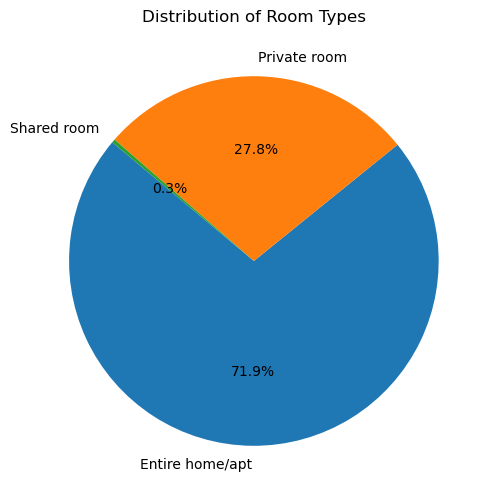

In [16]:
room_type_counts=df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Room Types')


# Show plot
plt.show()

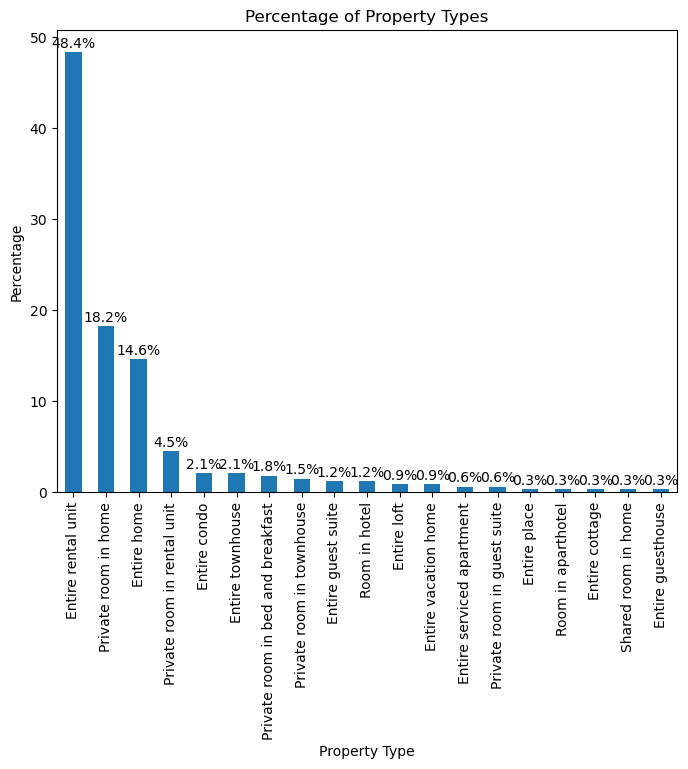

In [17]:
property_type_counts = df['property_type'].value_counts()

# Calculate the percentage of each property type
property_type_percentage = (property_type_counts / len(df)) * 100

# Create a histogram
plt.figure(figsize=(8, 6))
property_type_percentage.plot(kind='bar')

# Add labels and title
plt.xlabel('Property Type')
plt.ylabel('Percentage')
plt.title('Percentage of Property Types')

# Display the percentage values on top of the bars
for i, percentage in enumerate(property_type_percentage):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')

# Show plot
plt.show()

In [18]:
df['price'] = df['price'].str.replace('$', '')

In [19]:
df['price'] = df['price'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

df['price'] = df['price'].astype(int)

In [20]:
#df['price']
#removing the $ sign from price column, and then turn it into int32 

121.9820895522388


<Axes: >

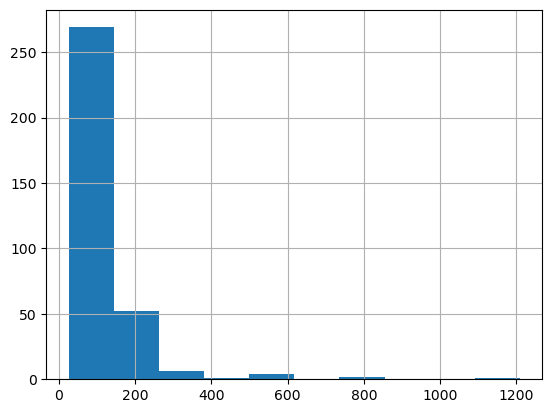

In [21]:
print(df['price'].mean())
df['price'].hist()


In [22]:
#most of airbnb hotels keep low cost with an average of 122$

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


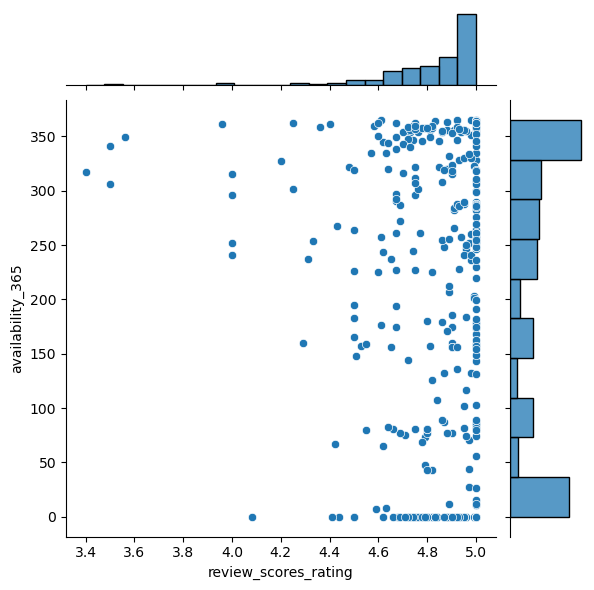

In [23]:
sns.jointplot(x='review_scores_rating', y='availability_365', data=df, kind='scatter')

plt.show()

In [24]:
#from the above scatter graph------> it appears that most of hotels are either fully booked for a year or have a few days booked,while scores dont have big effect

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


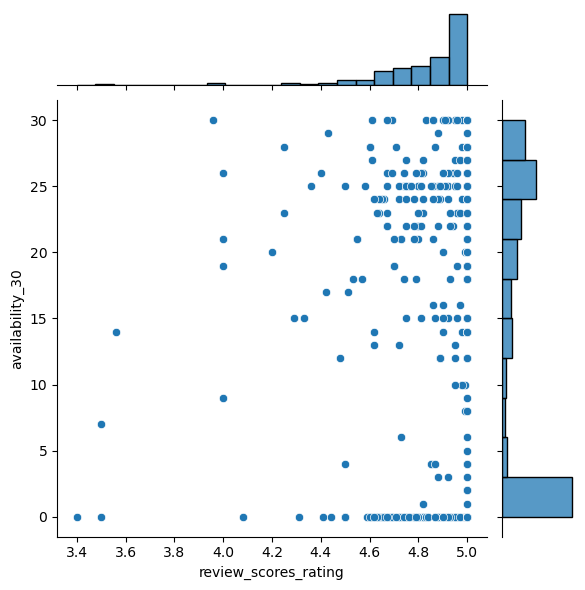

In [25]:
sns.jointplot(x='review_scores_rating', y='availability_30', data=df, kind='scatter')

plt.show()

In [26]:
##when looking to smaller range, hotels are either fully booked in a month or at least half booked,while scores dont have big effect

AttributeError: Line2D.set() got an unexpected keyword argument 'subplot'

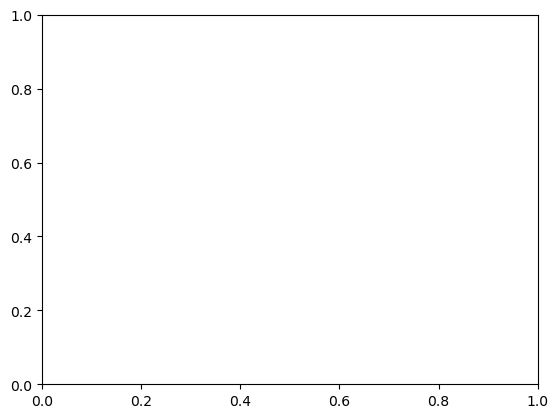

In [27]:
avail = ['availability_30', 'availability_60','availability_90', 'availability_365']
df[avail].plot(kind='density',subplot=True, sharex=False)

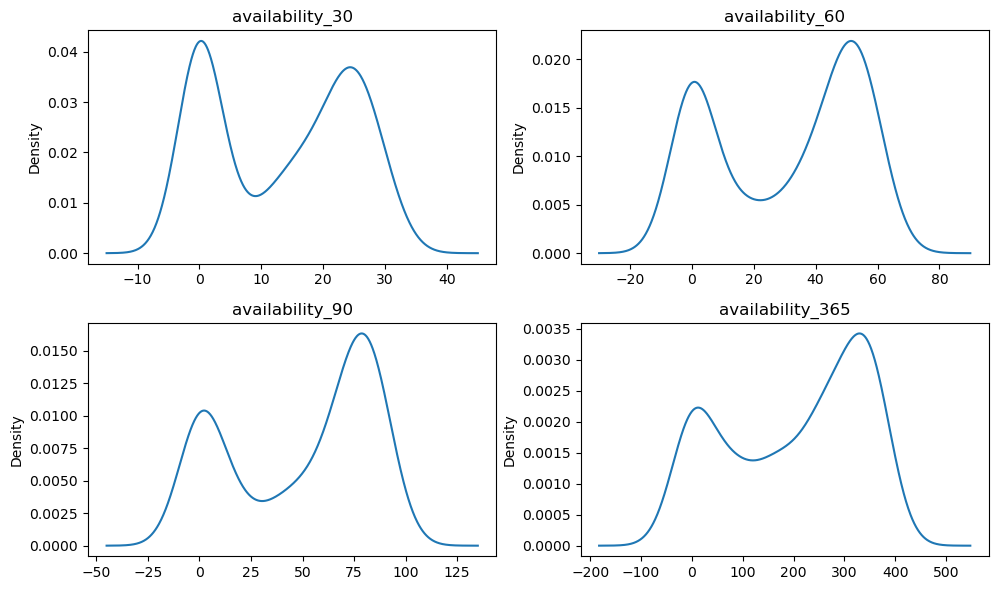

In [28]:
avail = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Create density plots for each availability type in separate subplots
plt.figure(figsize=(10, 6))

for i, a in enumerate(avail, 1):
    plt.subplot(2, 2, i)
    df[a].plot(kind='density')
    plt.title(a)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [29]:
#the 4 availability types have a clear drop in the middle of them, it means either the hotels are fully booked or not,
#,availabilty 30 is the only one that have higher peak at begaining more than at the end, it means most of the hotels are booked in a range of a month, but in a range of more than that more days appears not not be booked 

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


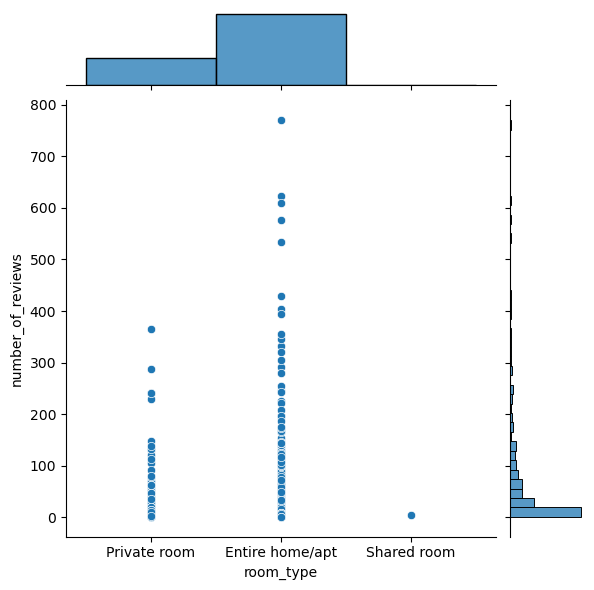

63.582089552238806


In [30]:
sns.jointplot(x='room_type', y='number_of_reviews', data=df, kind='scatter')

plt.show()
print(df['number_of_reviews'].mean())


In [31]:
###### also most of all types of rooms have a small mean of reviews of about 63 review for each hotel

In [32]:
d={'t':True , 'f' :False}
#df['instant_bookable']= df['instant_bookable'].map(d)
df=df.replace({'instant_bookable':d})
df['instant_bookable']

0      False
1      False
2      False
3      False
4      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14      True
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22      True
24     False
25     False
26      True
28     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38      True
39     False
40     False
41     False
42      True
43      True
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
65     False
66     False
67      True
68     False
69      True
71     False
72     False
73     False
74     False
75      True
76     False
77      True
78     False
79     False
80     False
81     False
82      True
84     False
85     False

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


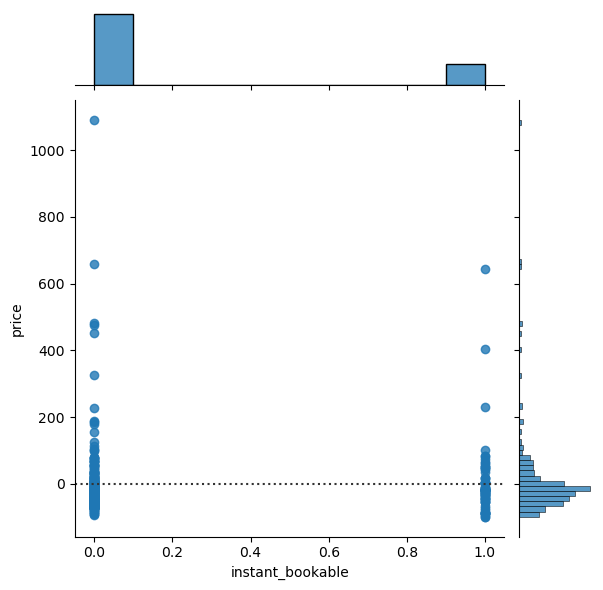

In [33]:
sns.jointplot(x='instant_bookable', y='price', data=df, kind='resid')

plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


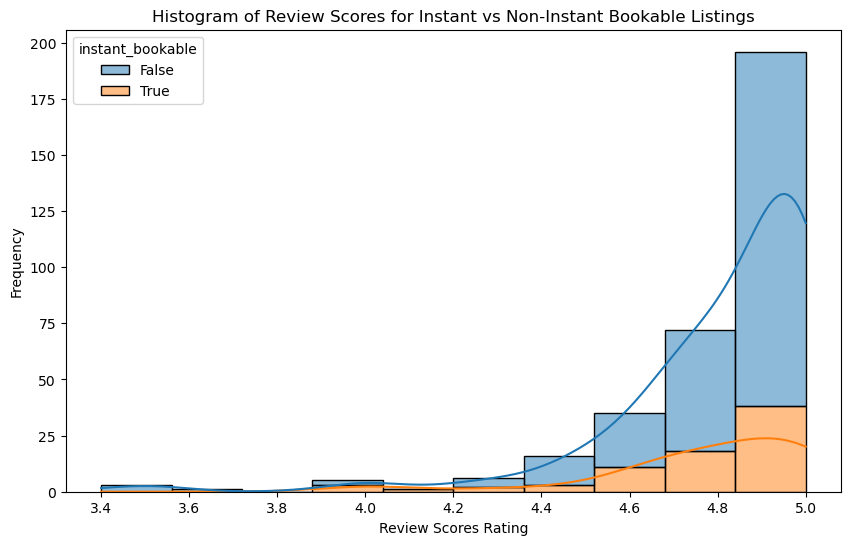

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_scores_rating', hue='instant_bookable', bins=10, kde=True, alpha=0.5, legend=True, multiple='stack')

# Add labels and title
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Review Scores for Instant vs Non-Instant Bookable Listings')

# Show plot
plt.show()

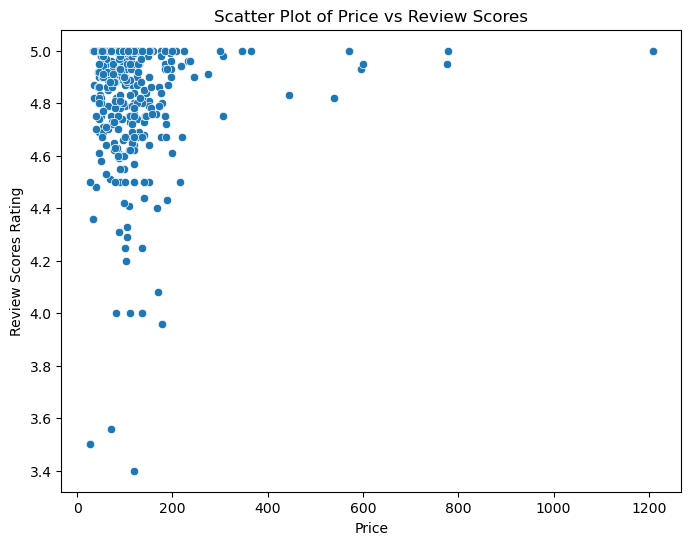

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='review_scores_rating', data=df)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.title('Scatter Plot of Price vs Review Scores')

# Show plot
plt.show()

In [36]:
#most of hotels have high score with low price, which says that all airbnb hotels have high quality

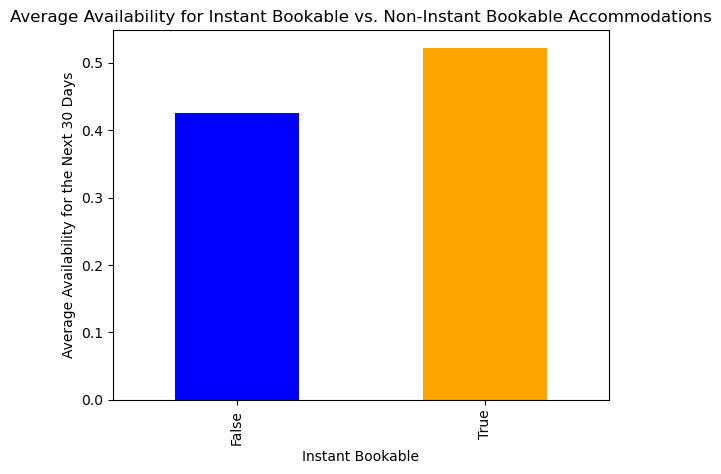

In [37]:
avg_availability = df.groupby('instant_bookable')['availability_30'].mean()/30

# Create a bar chart
avg_availability.plot(kind='bar', color=['blue', 'orange'])


plt.xlabel('Instant Bookable')
plt.ylabel('Average Availability for the Next 30 Days')
plt.title('Average Availability for Instant Bookable vs. Non-Instant Bookable Accommodations')
plt.show()